In [56]:
# citation:
# https://learn.microsoft.com/en-us/python/api/overview/azure/ai-textanalytics-readme?view=azure-python-preview&preserve-view=true
# https://towardsdatascience.com/how-to-make-word-clouds-in-python-that-dont-suck-86518cdcb61f

import json
import pandas as pd
from azure.core.credentials import AzureKeyCredential
from azure.ai.textanalytics import TextAnalyticsClient
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def calculate_score(document):
    # api Key and endpoint
    credential = AzureKeyCredential("aa041270d50d414f93846bfe0ab1e666")
    endpoint="https://cs410project.cognitiveservices.azure.com/"

    text_analytics_client = TextAnalyticsClient(endpoint, credential)

    response = text_analytics_client.analyze_sentiment(document, language="en")
    result = [doc for doc in response if not doc.is_error]
    for doc in result:
        positive_score = doc.confidence_scores.positive
        neutural_score = doc.confidence_scores.neutral
        negative_score = doc.confidence_scores.negative
        final_score = positive_score*2.5 + neutural_score*5 + negative_score*0
    return final_score

def add_score(input):
    res = []
    for r in input:
        i = {}
        i['business_id'] = r['business_id']
        i['predit_yelp_score'] = calculate_score([r['review']])
        res.append(i)
    return res
  
def create_word_cloud(input_path):
    with open(input_path, encoding='utf-8') as f:
        line = f.readline()
        all_data = json.loads(line)
        f.close()
    new_data = add_score(all_data)
    business_data = pd.read_json('yelp-data/yelp_academic_dataset_business.json', lines=True)
    temp_Name_score = []
    for i in new_data:
        temp = {}
        busin_info = business_data[business_data['business_id'] == i['business_id']] 
        dict1 = busin_info.to_dict()
        name_temp = dict1['name'].values()
        temp['name'] = list(name_temp)[0]
        temp['predit_yelp_score'] = i['predit_yelp_score']
        temp_Name_score.append(temp)
    all_new_data = pd.DataFrame(temp_Name_score)
    avg_all_data = all_new_data['predit_yelp_score'].groupby(all_new_data['name']).mean()
    wordcloud = WordCloud(background_color="white", width =3000, height=2000).generate_from_frequencies(avg_all_data)
    plt.figure(figsize=[20,15])
    plt.imshow(wordcloud)
    
  

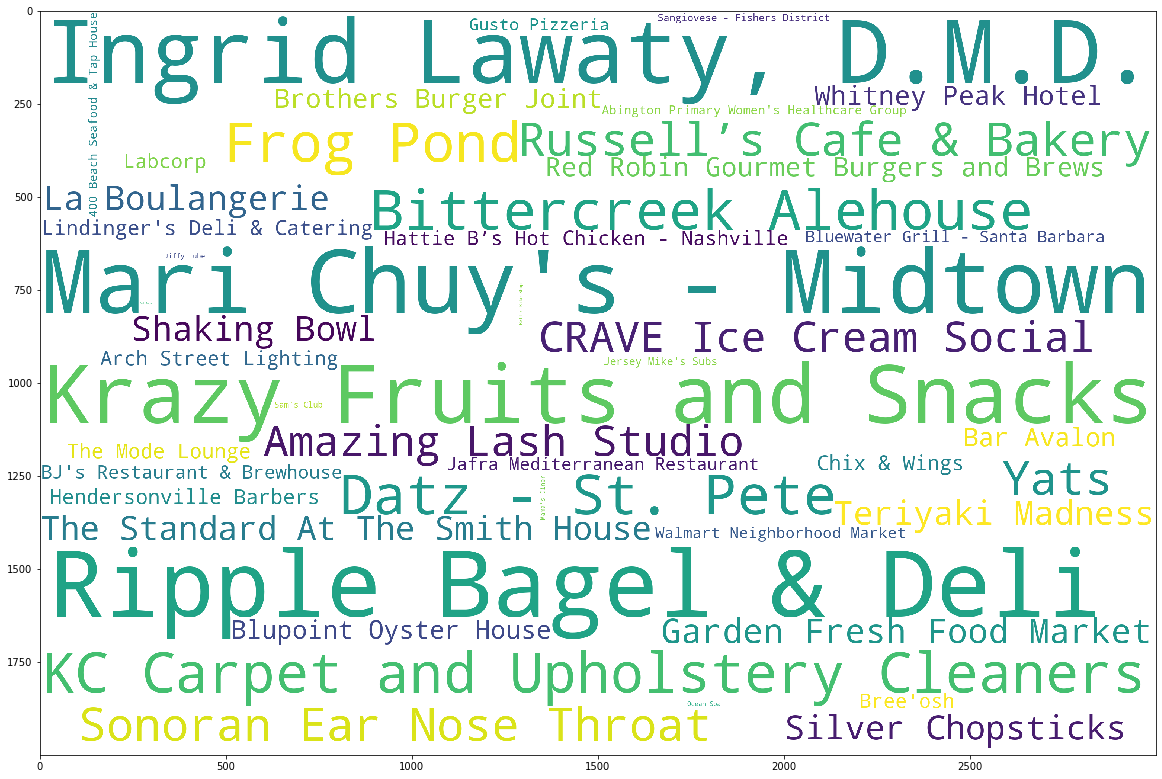

In [57]:
input_path = 'choose_data/covid_19date.json'
avg_all_data_covid = create_word_cloud(input_path)


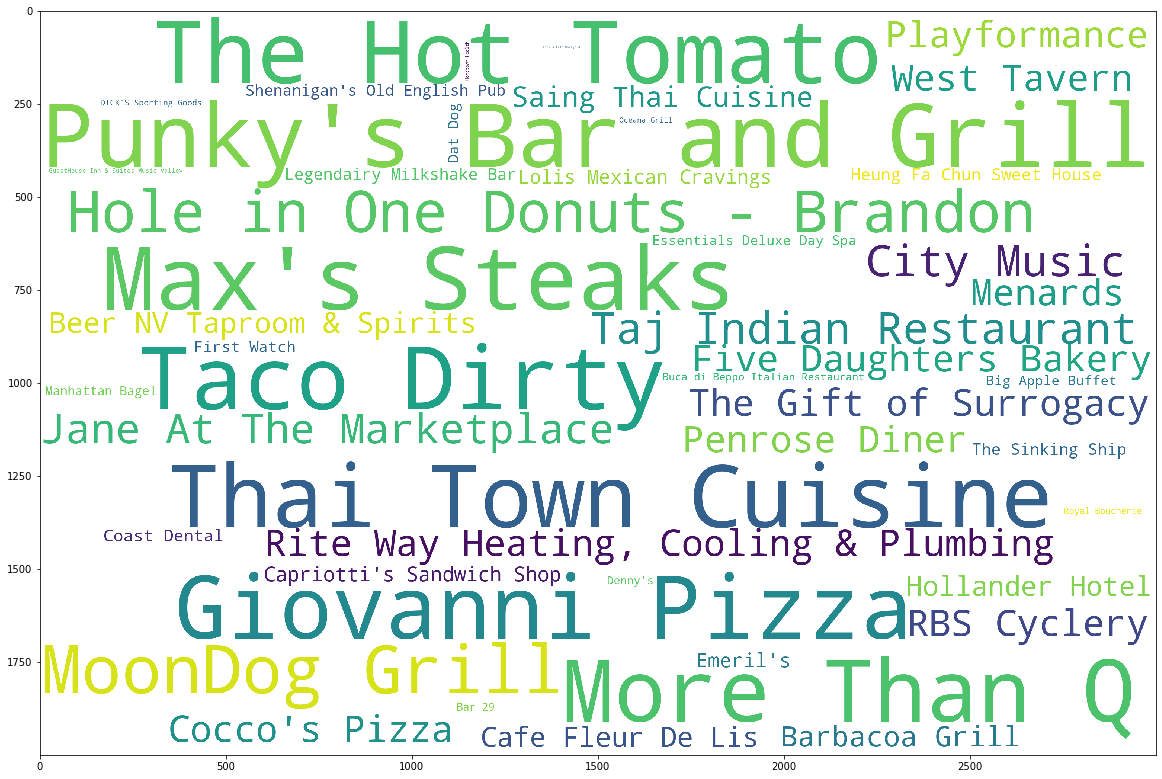

In [58]:
input_path = 'choose_data/nocovid_19date.json'
avg_all_data_covid = create_word_cloud(input_path)

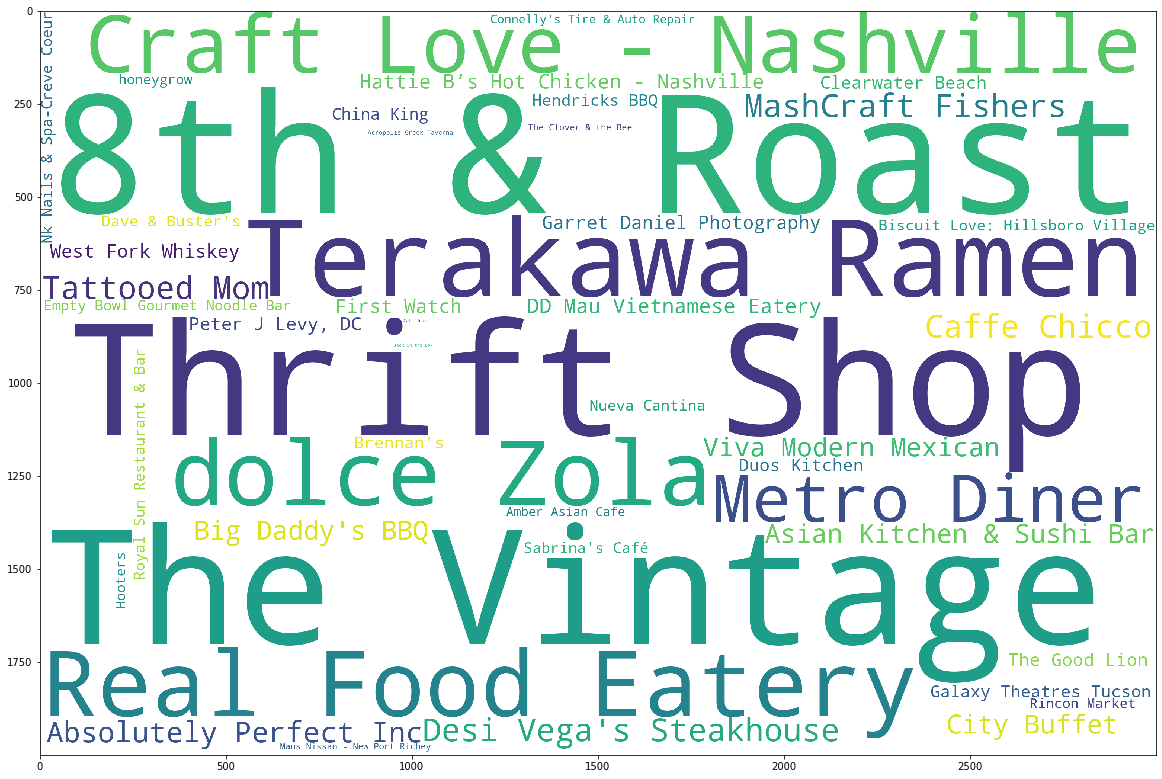

In [59]:
input_path = 'choose_data/thanksgiving/thanksgiving18.json'
avg_all_data_covid = create_word_cloud(input_path)